<a href="https://colab.research.google.com/github/Lawisss/Borrowing-Capacity-Analysis/blob/main/Borrowing_capacity_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Ecrire une fonction qui calcule, pour un nombre donné, le plus proche multiple de 2,5

Par exemple : 
*   17 => 17.5
*   126 => 125
*   1279 => 1280


In [ ]:
def multiple(nombre : int, base=2.5):
    """
    Fonction qui calcule le multiple de 2.5 le plus proche du nombre donné
    1) S'assurer que le nombre divisé par 2.5 est un entier arrondi
    2) Multiplier par la base pour trouver le plus proche multiple

    """
    return base * round(nombre/base)

In [ ]:
multiple(17), multiple(126), multiple(1279)

(17.5, 125.0, 1280.0)

## 2. Ecrire une fonction qui calcule le nombre de jours entre deux dates 

La deux paramètres de la fonction devraient êtres des dates entrées **manuellement** (string) en format Day-Month-Year (ex : 10-12-2020)


In [ ]:
from datetime import datetime

def deltaday(date_debut : str, date_fin : str):
    """
    Fonction qui calcule le nombre de jours entre deux dates.
    1) Conversion dans un format date
    2) Différence des deux dates
    3) Retour des jours seulement

    """
    date_debut = datetime.strptime(date_debut, '%d/%m/%y')
    date_fin = datetime.strptime(date_fin, '%d/%m/%y')
    delta = date_fin - date_debut
    return delta.days

In [ ]:
deltaday('10/12/20', '12/12/20')

2

## 3. Dessiner un graphique représentant le profit théorique d'une option Long Call 

Pour plus d'informations sur les options Long Call : https://www.macroption.com/call-option-payoff/


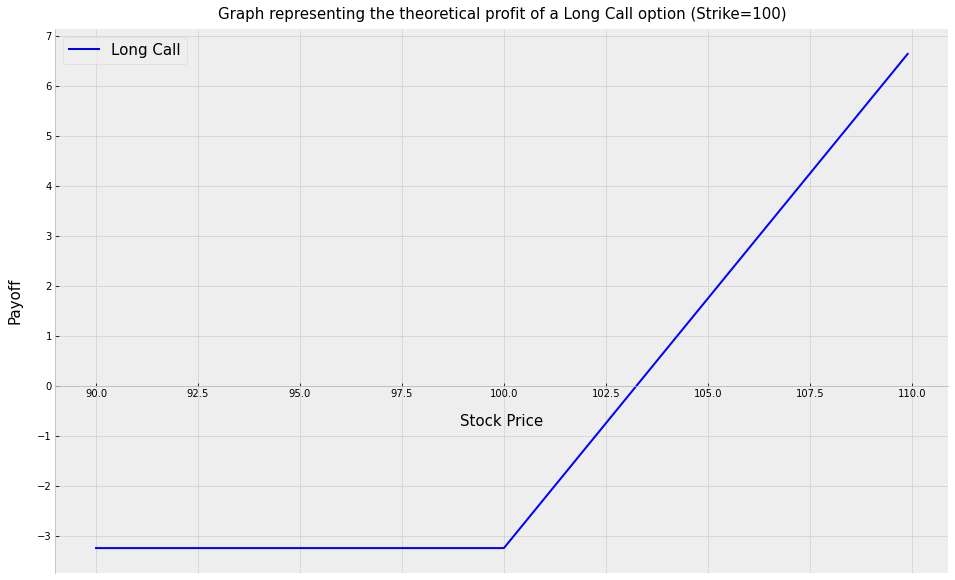

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

quantity = 10 # Quantity of contracts
CallPremium = 3.25 # Price of the Call Premium
strike = 100 # Strike Price of the Call Option
range_price = np.arange(round(strike*0.9,1), round(strike*1.1,1), 0.1) # X-Axis

# If St > K : max(St-K;0) 
# If St < K : option given up and payoff null
# St : underlying price on the maturity date t
# K : Strike price  
payoff = [max(-CallPremium, St-strike-CallPremium) for St in range_price] 

# Graph Axes
plt.style.use("bmh")
plt.figure(figsize=(16,10))
ax = plt.gca()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # X-axis in the center
ax.yaxis.set_ticks(range(-4, 20)) # Y-axis scaling

# Graph Plot
ax.plot(range_price, payoff, label='Long Call', color='b')

# Graph features
plt.xlabel('Stock Price', fontsize=15, labelpad=15) # X-label
plt.ylabel('Payoff', fontsize=15, labelpad=15) # Y-label
plt.title('Graph representing the theoretical profit of a Long Call option (Strike=100)', fontsize=15,  pad=10)
plt.legend(loc='upper left', fontsize=15)

plt.show()

## 4.  Prédire la capacité d'emprunt de nos clients afin de les orienter vers de l'investissement immobilier


😫 **Besoin de l'équipe Sales** : Nous recevons de nombreux Leads et aimerions avoir un pôle dédié à l'immobilier qui proposerait aux clients des investissements immobilier nécessitant d'emprunter à la banque. Or, nous ne savons pas à l'avance quelle est la capacité d'emprunt de nos clients et devons tous les appeler avant de les orienter. On perd beaucoup de temps et d'argent, pouvez-vous nous aider ? Il faut **au minimum 200K€ de capacité d'emprunt pour acheter un bien immobilier.**

💡 **Proposition du pôle Product à l'équipe Data** : Peut-être est-il possible de créer un algorithme capable de **prédire la capacité d'emprunt des Leads**. L'objectif est d'améliorer l'aiguillage des Leads, donc la prédiction n'a pas besoin d'être parfaite mais doit permettre d'aider à la décision. 

📚 **Instruction du manager Data** : Il faudrait commencer par une **analyse descriptive** pour pouvoir mieux comprendre la nature du dataset. La Data est déjà clean mais peut-être auras-tu besoin de transformer certaines variables. Ensuite, lors de la **modélisation**, pas la peine d'essayer 20 méthodes différentes pour le fit-predict, je préfère avoir une seule proposition bien justifiée. Enfin, j'aimerais que tu **interprètes les résultats** en insistant sur la manière dont on pourra utiliser ton algorithme et comment les Sales pourront en bénéficier. En bonus, j'aimerais savoir si tu as des idées sur comment **améliorer notre dataset** pour gagner en précision, notamment en allant chercher des données complémentaires.

---


Chaque ligne du Dataset contient les informations liées à un Lead/client qui a effectué une simulation sur Tacotax.fr.
Voici la définition des variables dont le nom n'est pas self-explanatory : 
*   Date de création : Jour du mois lors duquel l'utilisateur a effectué sa simulation
*   RAB : Revenu annuel Brut
*   MED14 : Niveau de vie de la commune de résidence (Insee)
*   Source : Source d'acquisition de l'utilisateur 

In [4]:
import pandas as pd
df = pd.read_csv("dataset_cleaned.csv")

### 1) Analyse descriptive

In [ ]:
df.sample(5)

,Unnamed: 0,Date de création,Age,Nombre d'enfants,Revenu mensuel net,Impôts,Capacité d'emprunt,Activité,Situation maritale,Logement,RAB,MED14,Source
291,291,12,51.0,0.0,5000.0,12144.0,54000.0,Dirigeant / indépendant,Divorcé,Propriétaire,72144.0,30246.7,Direct
858,858,23,27.0,0.0,4500.0,4500.0,56000.0,Salarié,Marié,Propriétaire,58500.0,30530.7,Search
63,63,6,33.0,2.0,7000.0,12000.0,200000.0,Salarié,Pacsé,Propriétaire,96000.0,16626.0,Search
692,692,12,31.0,0.0,3300.0,7800.0,240000.0,Salarié,Célibataire,Locataire,47400.0,30530.7,Search
127,127,14,34.0,2.0,80000.0,355855.0,500000.0,Dirigeant / indépendant,Marié,Propriétaire,1315855.0,30530.7,Search


In [ ]:
df.shape

In [6]:
df["Capacité d'emprunt"].describe() 

count      1219.000000
mean     192530.652994
std      128267.255880
min           1.000000
25%       93000.000000
50%      168000.000000
75%      259120.000000
max      500000.000000
Name: Capacité d'emprunt, dtype: float64

En moyenne la capacité d'emprunt ne semble déjà pas suffisante pour acheter un bien immobilier. (Voir moyenne + médiane)

In [7]:
df["Age"].describe() 

count    1219.000000
mean       35.341887
std         7.756548
min        19.000000
25%        30.000000
50%        34.000000
75%        39.000000
max        59.000000
Name: Age, dtype: float64

En moyenne, l'âge est de 35 ans et les valeurs semblent être réparties de manière homogène autour cette dernière. A exploiter si forte corrélation.

### 2) Nettoyage des données

In [8]:
df = df.rename(columns={'Unnamed: 0': 'Client', 'Capacité d\'emprunt': 'Capacité emprunt', 'Nombre d\'enfants': 'Nombre enfants'})
df = df.drop(['Date de création', 'Source'], axis=1)
df.head()

,Client,Age,Nombre enfants,Revenu mensuel net,Impôts,Capacité emprunt,Activité,Situation maritale,Logement,RAB,MED14
0,0,37.0,0.0,3500.0,5484.0,150000.0,Dirigeant / indépendant,Célibataire,Locataire,47484.0,16626.0
1,1,40.0,2.0,10000.0,17553.0,79000.0,Dirigeant / indépendant,Marié,Propriétaire,137553.0,30530.7
2,2,32.0,0.0,2994.0,3844.0,78000.0,Salarié,Célibataire,Locataire,39772.0,22380.7
3,3,31.0,0.0,10900.0,23603.0,500000.0,Salarié,Marié,Propriétaire,154403.0,22380.7
4,4,36.0,1.0,6500.0,7780.0,175000.0,Salarié,Marié,Propriétaire,85780.0,30530.7


### 3) Affichage patterns

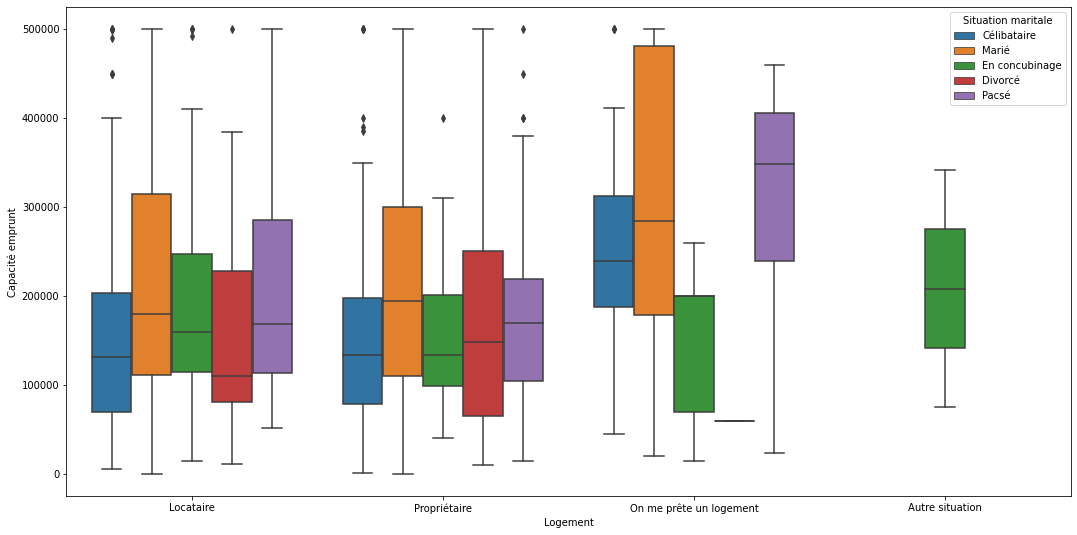

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,9))
sns.boxplot(x='Logement', y='Capacité emprunt', hue="Situation maritale", data=df)

Selon les logements, les mariés ont toujours une capacité d'emprunt plus élevé (pouvoir d'achat plus élevé car deux salaires). En moyenne, les locataires ont une plus grande capacité d'emprunt que les propriétaires. Ces derniers ont certainement déjà un/des prêt(s) en cours par rapport à leur premier logement.

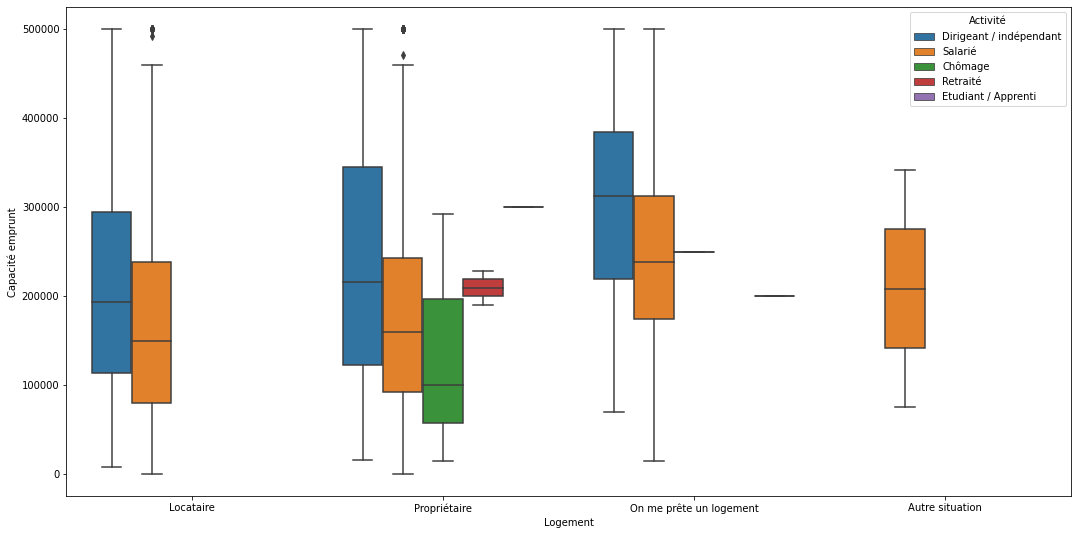

In [10]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Logement', y='Capacité emprunt', hue="Activité", data=df)

Sans suprise, les dirigeants ont une meilleure capacité d'emprunt que les salariés ou autres. Manque de diversité des données.

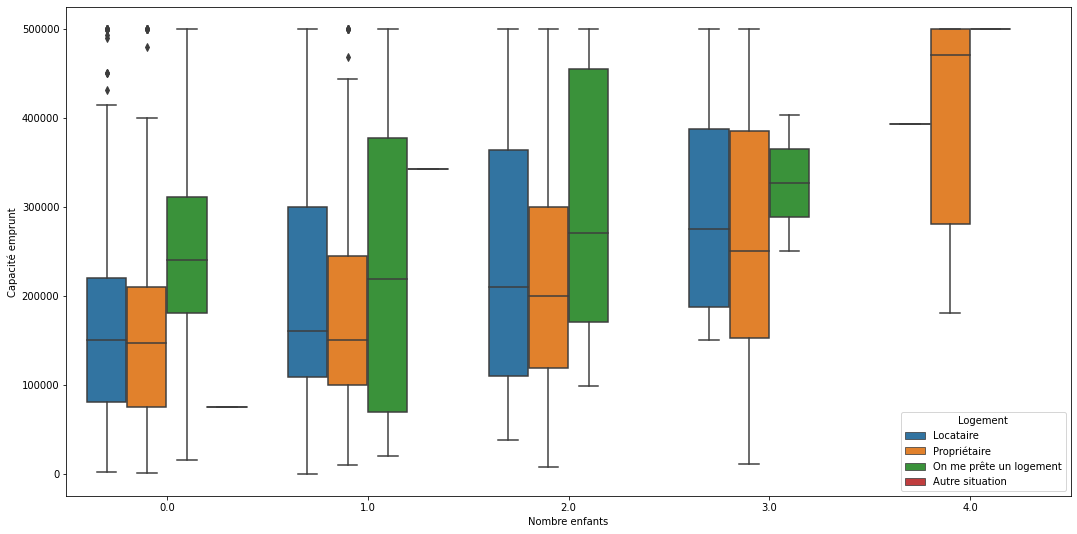

In [11]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Nombre enfants', y='Capacité emprunt', hue="Logement", data=df)

Quelque soit le logement, plus le nombre d'enfant augmente plus la capacité d'emprunt augmente. Résultat contre-intuitif dans la mesure où les enfants ont un impact négatif direct sur le reste à vivre. Les clients avec le plus d'enfants doivent certainement avoir de meileurs revenus que ceux qui n'en n'ont pas, des réductions d'impôts, ou encore doivent habités dans une commune où le niveau de vie est élevé (voir MED14 pour situer socialement).

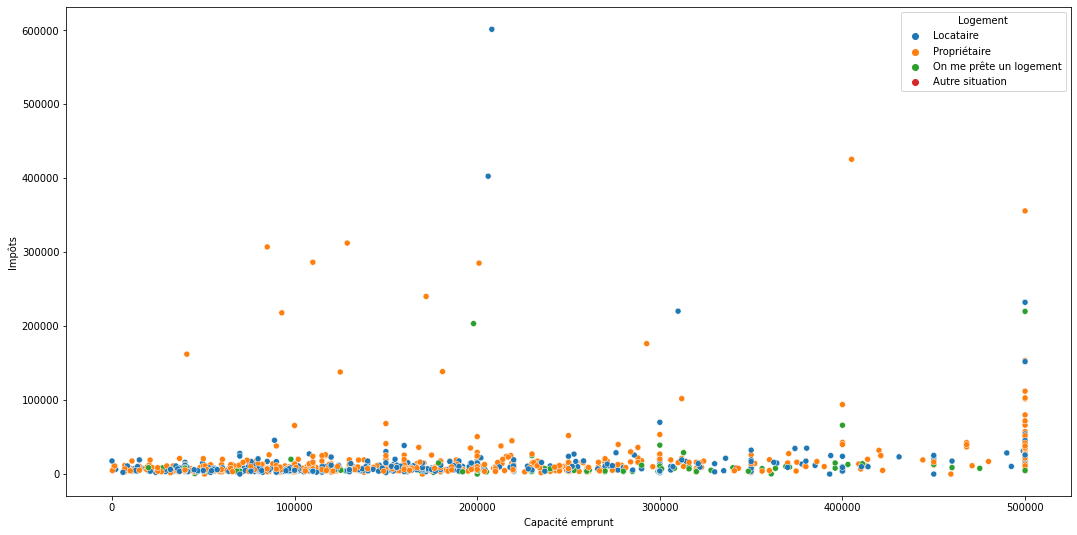

In [12]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='Capacité emprunt', y='Impôts', hue="Logement", data=df)

A part pour quelques outliers, plus les impôts augmentent plus la capacité d'emprunt augmente. Augmentation légère cependant.

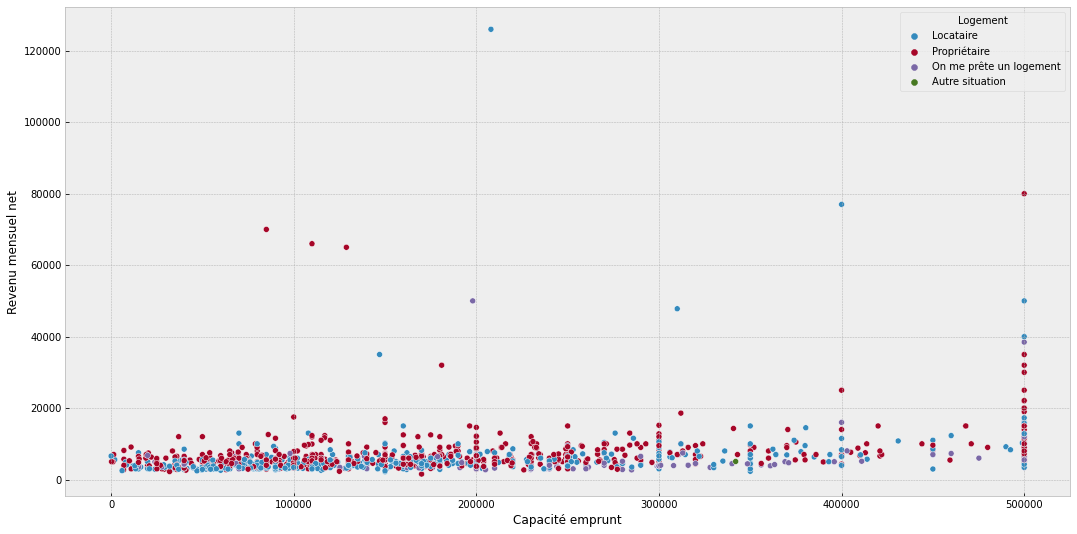

In [ ]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='Capacité emprunt', y='Revenu mensuel net', hue="Logement", data=df)

A part pour quelques outliers, plus les revenus mensuel net augmentent plus la capacité d'emprunt augmente. Augmentation légère cependant.

### 4) Encodage caractéristiques

Les colonnes **Activité**, **Situation maritale** et **Logement** qui sont nécessaire pour évaluer la capacité d'emprunt.

In [13]:
from sklearn.preprocessing import LabelEncoder

cols = ["Activité", "Situation maritale", "Logement"]
LabelEncoder = LabelEncoder()

for col in cols:
  df[col] = LabelEncoder.fit_transform(df[col])

df.head()

,Client,Age,Nombre enfants,Revenu mensuel net,Impôts,Capacité emprunt,Activité,Situation maritale,Logement,RAB,MED14
0,0,37.0,0.0,3500.0,5484.0,150000.0,1,0,1,47484.0,16626.0
1,1,40.0,2.0,10000.0,17553.0,79000.0,1,3,3,137553.0,30530.7
2,2,32.0,0.0,2994.0,3844.0,78000.0,4,0,1,39772.0,22380.7
3,3,31.0,0.0,10900.0,23603.0,500000.0,4,3,3,154403.0,22380.7
4,4,36.0,1.0,6500.0,7780.0,175000.0,4,3,3,85780.0,30530.7


### 5) Affichage des corrélations

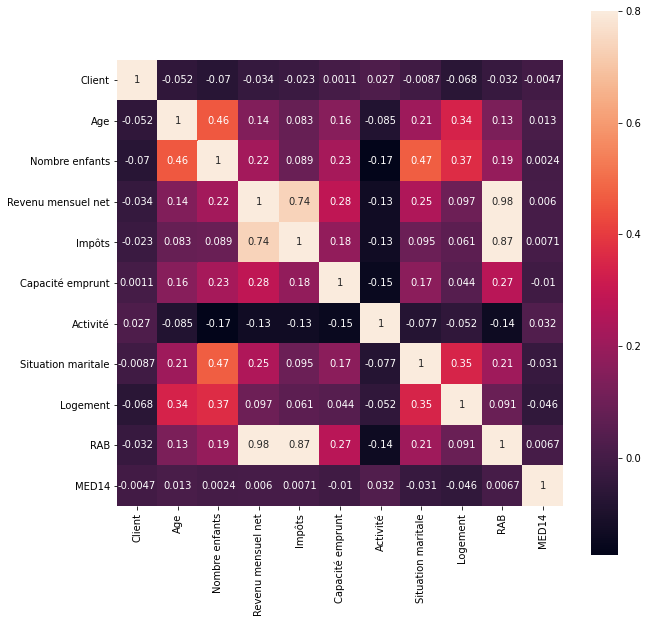

In [14]:
corrmat = df.corr(method="pearson")
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

La capacité d'emprunt semble être plus corrélée avec le revenu mensuel net, le nombre d'enfants et le RAB. Le nombre d'enfant, la situation maritale, et l'âge aussi ont un rôle.

### 6) Séparation label / caractéristiques


In [22]:
X = df[['Age', 'Nombre enfants', 'Revenu mensuel net', 'Impôts', 'Situation maritale', 'Logement', 'RAB']]
y = df.iloc[:,5]

### 7) Sélection du modèle




L'objectif était de prédire la capacité d'emprunt des clients. Tout d'abord il est important de notifier que la capacité d'emprunt dépend de beaucoup de variables quantitatives/qualitatives et que certaines de ces variables manques mais peuvent être calculées.

Il s'agit ici d'utiliser des données étiquetées pour associer une valeur numérique à un objet, c'est donc un problème de régression. Les données étant assez faibles, on va chercher à optimiser un maximum le modèle prédictif en combinant d'autres modèles plus faibles. Nous allons donc appliquer la méthode du gradient boosting XGBoost (XGBRegressor). Ce dernier est une version plus rapide et plus précise de Gradient Boosting. 

En effet :


*   Il est facile à implémenter dans scikit-learn.
*   Il obtient de meilleurs résultats que les modèles individuels car ensembliste
*   Il est régularisé, donc les modèles par défaut ne sont souvent pas surajustés.
*   Il est très rapide et apprend de ses erreurs
*   Il  dispose d'hyperparamètres étendus pour un réglage fin


Le gradient boosting est un algorithme qui minimise une fonction de perte (moindres carrés ici) de manière successive à l’instar d’une descente de gradient. Il overfit relativement rapidement. On a donc besoin de méthodes de régularisation, qui pénalisent différentes parties de l’algorithme en permettant ainsi de réduire l’overfitting global.

Les différents paramètres qui permettent de limiter l’overfitting sont : le nombre d’arbres, la profondeur des arbres, le nombre d’observations utilisées par séparation d’un arbre, et le minimum d’amélioration apporté par chaque nouvelle séparation dans un arbre. Nous allons essayer de jouer sur ces paramètres.

Pour évaluer notre modèle, nous prendrons la moyenne de la somme des carrés des résidus, sa racine carré et la précision. Nous tracerons l'erreur quadratique moyenne du modèle XGBoost pour chaque itération (Boostrap) sur les ensembles de données d'entraînement et de test afin de savoir à partir de quand les prédictions dévies et la minimisation s'arrête. En outre, nous montrerons la volatilité de la capacité d'emprunt à travers les itérations. Enfin nous afficherons l'importance des caractéristiques du tracé afin d'obtenir des indications claires sur l'évaluation de la capacité d'emprunt (caractéristiques sur lesquelles pourront s'appuyer les sales).

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train, eval_metric="rmse", eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Pas de cross-validation car résultat inférieur ou sensiblement le même.

In [50]:
from sklearn.metrics import mean_squared_error

score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

y_pred = xgbr.predict(X_test)
score = xgbr.score(X_test, y_test)  
print("Test score: ", score)
print()
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f (Critère d'exactitude à bonne échelle)" % (mse**(1/2.0)))

Training score:  0.4956427713108831
Test score:  0.2819064447239883

MSE: 12532908554.43
RMSE: 111950.47 (Critère d'exactitude à bonne échelle)


Score de prédiction faible mais qui ne surajuste pas. Le risque était d'avoir  un 0.90 en training score et un 0.05 en test score.

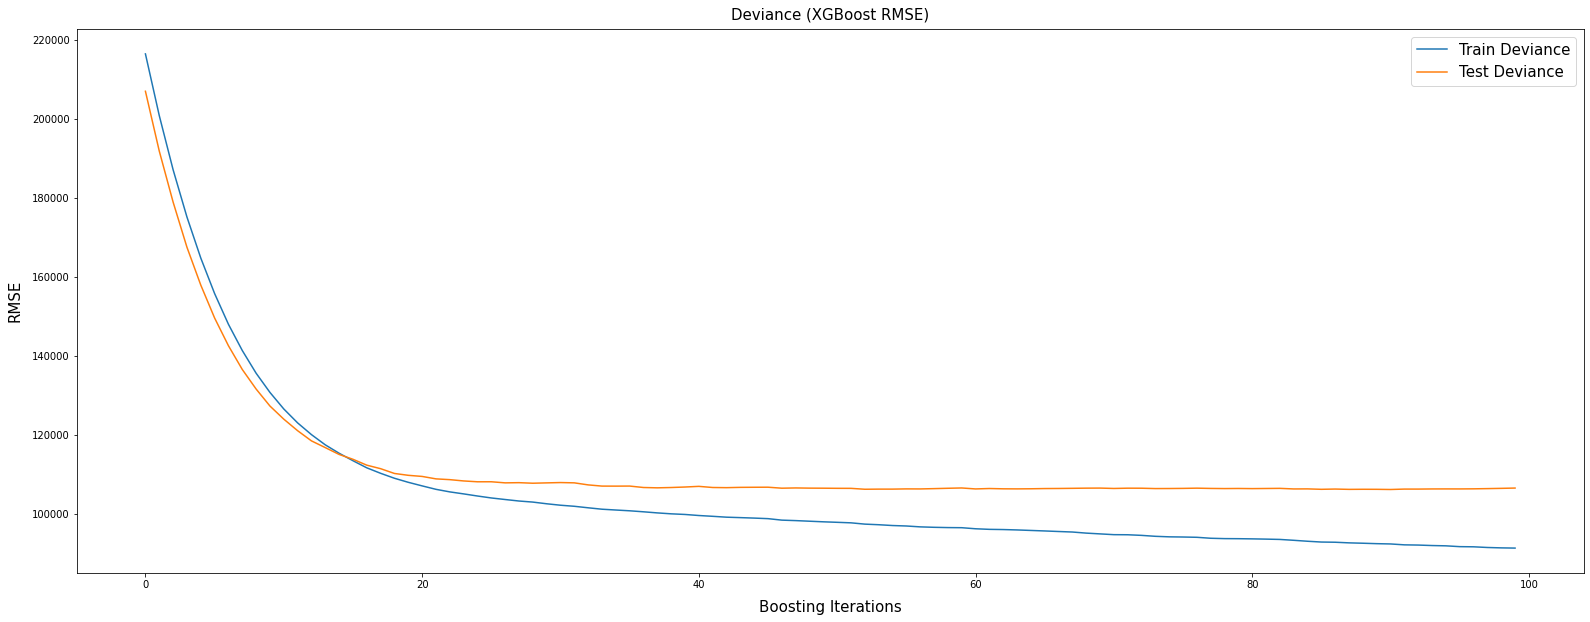

In [26]:
results = xgbr.evals_result()
epochs = len(results['validation_0']['rmse'])

plt.figure(figsize=(27,10))
x_axis = range(0, epochs)
plt.plot(x_axis, results['validation_0']['rmse'], label='Train Deviance')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test Deviance')
plt.legend(loc='best', fontsize=15)
plt.xlabel('Boosting Iterations', labelpad=10, fontsize=15)
plt.ylabel('RMSE', labelpad=10, fontsize=15)
plt.title('Deviance (XGBoost RMSE)', pad=10, fontsize=15)
plt.show()

Le graphique montre la perte quadratique moyenne du modèle XGBoost pour chaque itération sur les ensembles de données d'apprentissage et de test. Après avoir examiné le graphique, il semble qu'il y ait une opportunité d'arrêter l'apprentissage prématurément, peut-être entre l'itération 30 et l'itération 40. 

Bonus possible : prendre en charge l'arrêt anticipé après un nombre fixe d'itérations grâce au paramètre "early_stopping_rounds" de XGBoost.

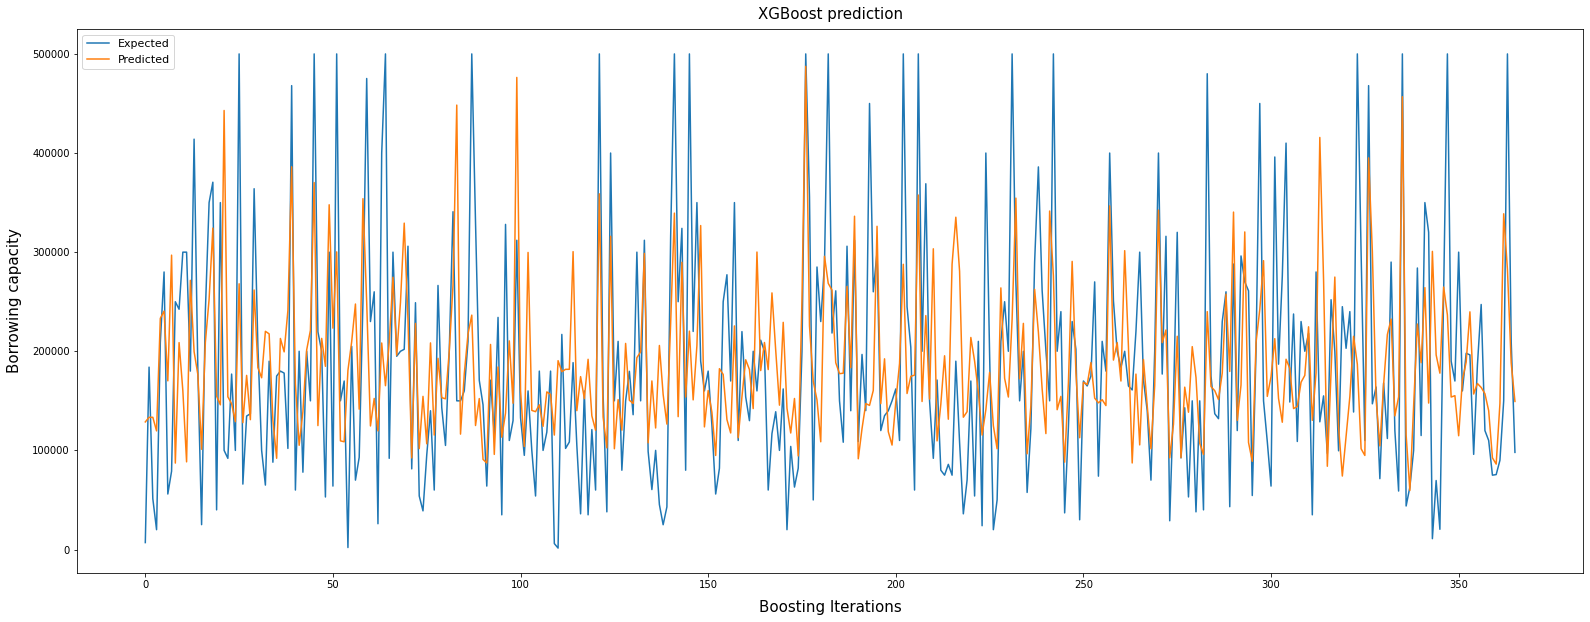

In [27]:
plt.figure(figsize=(27,10))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Expected")
plt.plot(x_ax, y_pred, label="Predicted")
plt.title("XGBoost prediction", pad=10, fontsize=15)
plt.xlabel('Boosting Iterations', labelpad=10, fontsize=15)
plt.ylabel('Borrowing capacity', labelpad=10, fontsize=15)
plt.legend(loc='best', fontsize=11)
plt.show()

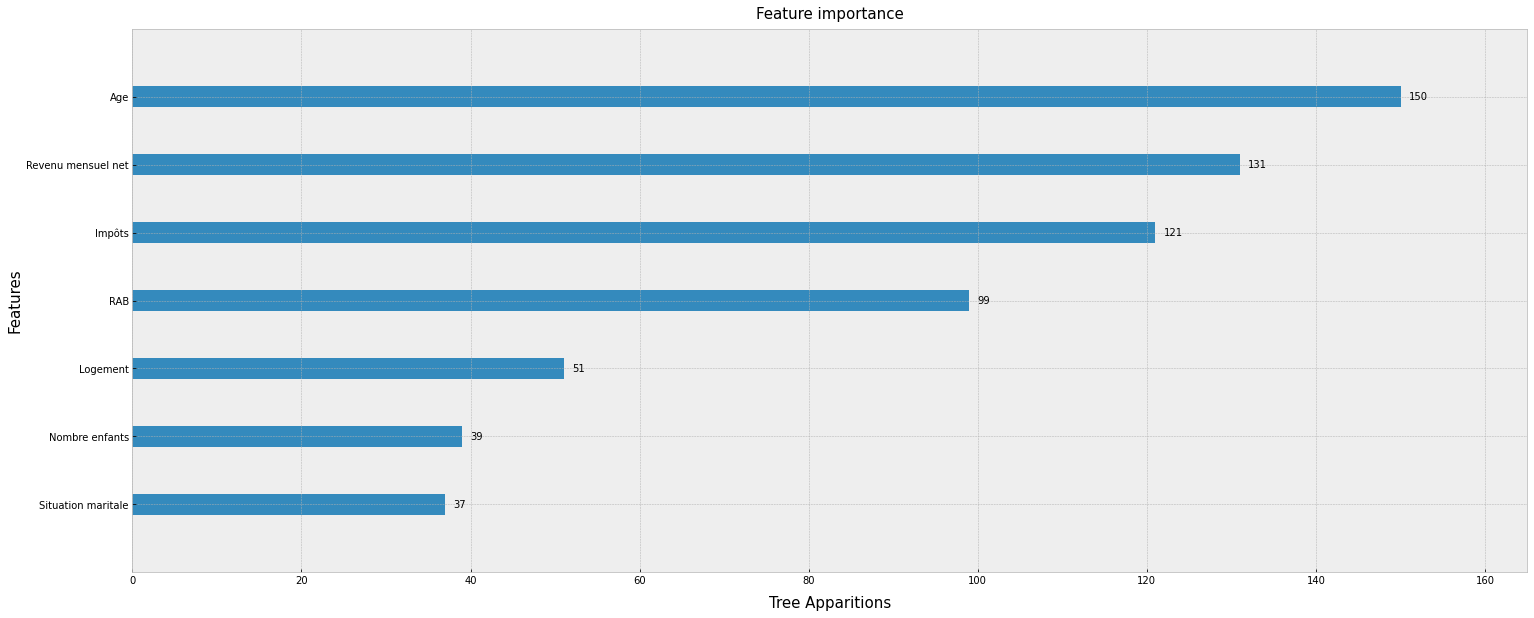

In [28]:
from xgboost import plot_importance
from sklearn import preprocessing
#std_scale = preprocessing.StandardScaler().fit(X)
#X_scale = std_scale.transform(X)


plt.style.use("bmh")
plt.figure(figsize=(25,10))
ax = plt.gca()
plt.title("Feature importance", pad=10, fontsize=15)
plt.xlabel('Tree Apparitions', labelpad=10, fontsize=15)
plt.ylabel('Features', fontsize=15)
plot_importance(xgbr, height=0.3, ax=ax, title=None, xlabel=None, ylabel=None)

Le graphique montre le classement des caractéristiques du modèle par ordre d'importance. L'importance est calculé grâce au poids (nombre de fois qu'une caractéristique apparaît dans un arbre). Cependant, ce tracé est trompeur dans la mesure où les importances basées sur les impuretés sont biaisées en faveur des caractéristiques de cardinalité élevée. En outre, l'importance des caractéristiques basées sur les impuretés est calculé à partir de l'ensemble des données d'entraînement. C'est à dire qu'elles ne reflètent pas la capacité de la fonction à être utile pour faire des prédictions qui se généralisent à l'ensemble de test. Elles favorisent le surajustement.

Pour ce faire, nous allons tracer l'importance de la permutation.  L'importance de la fonction de permutation est définie comme étant la diminution du score d'un modèle lorsqu'une seule caractéristique est mélangée au hasard. Cette procédure rompt la relation entre la fonction et la cible, ainsi la baisse du score du modèle indique à quel point le modèle dépend de la fonction. Cette technique a l'avantage d'être indépendante du modèle et peut être calculée plusieurs fois avec différentes permutations de l'entité.



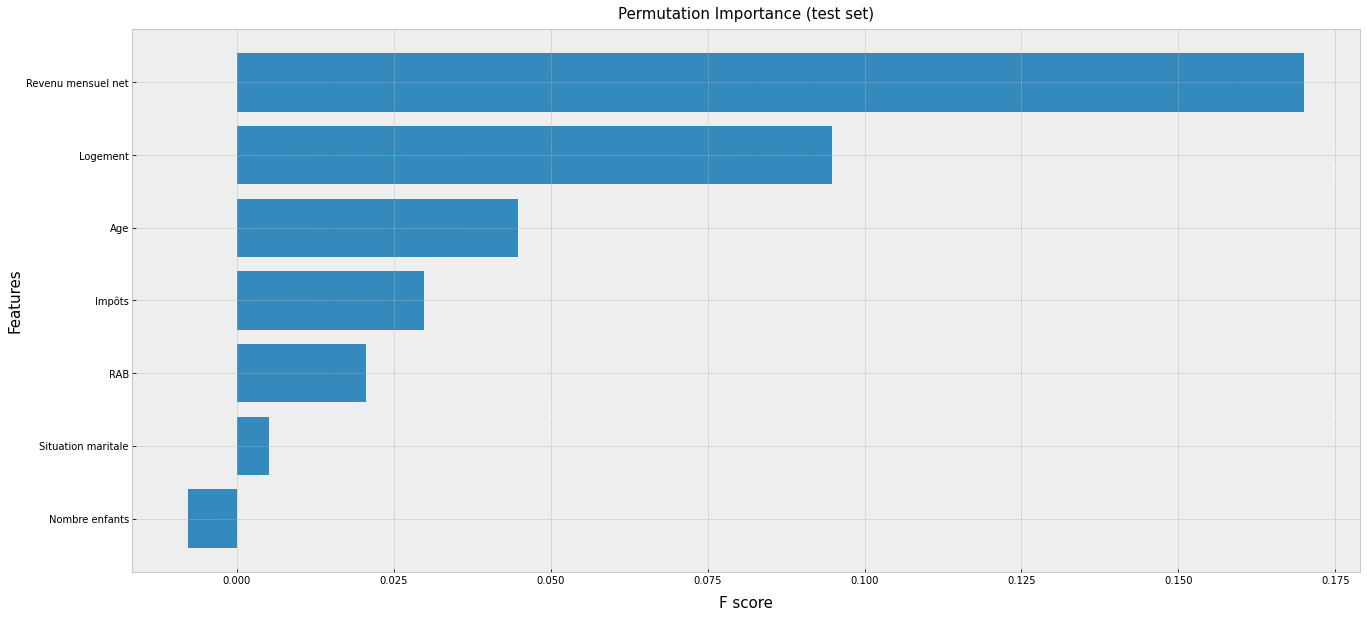

In [29]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.style.use("bmh")
plt.figure(figsize=(22,10))
ax = plt.gca()
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Importance (test set)", pad=10, fontsize=15)
plt.xlabel('F score', labelpad=10, fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

Ainsi, on constate que les caractéristiques qui ont un plus grand pouvoir prédictif sont le revenu mensuel net, le logement et le RAB. Ce qui confirme notre hypothèse de départ.

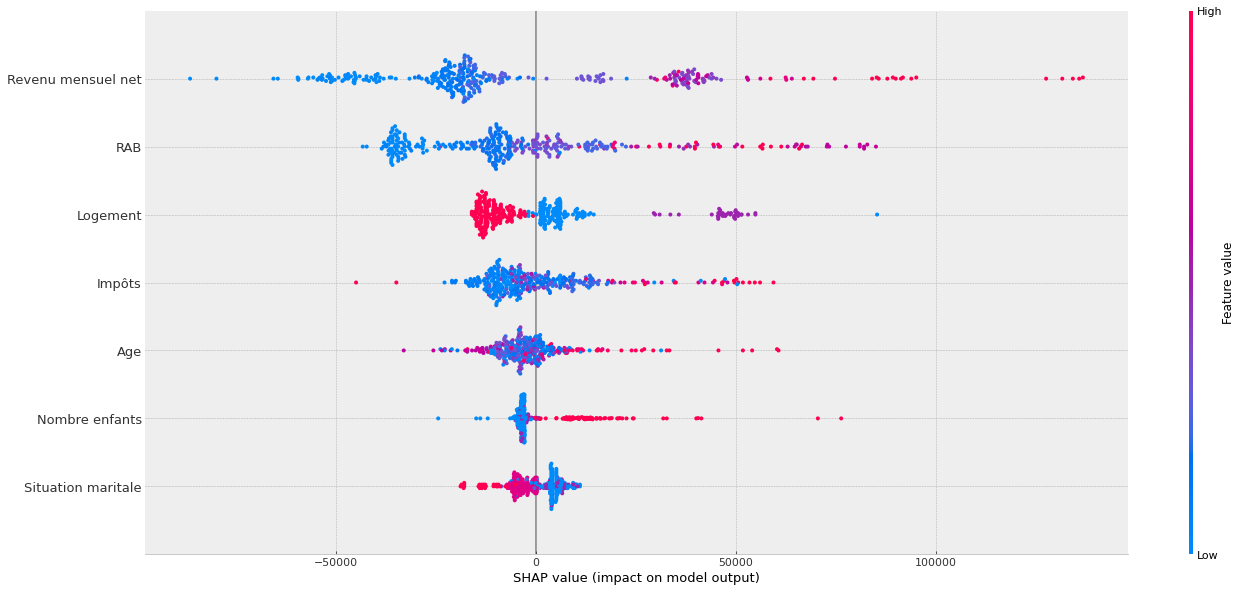

In [30]:
import shap

explainer = shap.TreeExplainer(xgbr)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, 
                       title="SHAP Importance", 
                       plot_size=(22,10))

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pour ce graphique, on constate :



*   Le nombre d'enfant et la situation maritale influent très peu sur la prédiction.
*   Les impôts élevés influent beaucoup et les impôts bas non.
*   Le logement polarise la prédiction qui peut être faible ou forte selon le type d'habitat
*   Un RAB élevé entraine une prédiction forte et inversement
*   De même pour le revenu mensuel net



### 7) Interprétation



Dans la mesure où nous manquons de données, où les variables catégorielles ont un faible pouvoir prédictif, le modèle ne pourra pas donner la capacité d'emprunt la plus précise possible pour un client. Néanmoins ce qui le rend intéressant est son compromis biais/variance stable qui lui permet d'être crédible quant aux caractéristiques importantes qu'il utilise. Le modèle nous informe sur plusieurs patterns de capacité d'emprunt qui sont propres à certains types de client.

En effet, grâce à l'analyse des caractéristiques importantes, on connait une partie des variables clés qui influent sur la capacité d'emprunt. Le modèle fournit une aide décisionnelle non négligeable aux sales qui au lieu d'appeler le client analyseront directement ses variables clés et leurs évolutions pour ensuite proposer un service adéquat au client. Par exemple, on transmet à l'algorithme des données clients pour prédire et voir où elles se situent par rapport au marché.

Ces derniers veilleront à être attentif aux revenus mensuels, au RAB, à l'âge et au type de logement pour suposer la capacité d'emprunt. Manipuler et visualiser les graphiques (boxplot) réalisés en première partie et dernière partie (summary_plot) devraient les aider à analyser les tensions du marché et place du client au sein de ce dernier.

### Bonus

Les données potentielles à rajouter pour le calcul de la capacité d'emprunt sont :

*   **Taux d’endettement**
*   **Reste à vivre du ménage emprunteur (Faux frais)**
*   **Durée du prêt immobilier**
*   **Taux du crédit immobilier**
*   Crédit en cours (Booléen)
*   Nombre de crédit en cours
*   Montant du crédit en cours
*   Montant du loyer
*   Pension alimentaire versées à un ex-conjoint

Plus le taux du crédit immobilier est élevé, plus les mensualités le sont également (à durée équivalente), ce qui réduit la capacité d’emprunt (taux d’endettement plus élevé, reste à vivre réduit). Dans l’autre sens, allonger la durée d’un prêt permet de diminuer les mensualités et d’augmenter le reste à vivre de l’emprunteur.






